# Intro to Pandas
by Ryan Orsinger

## Introducing DataFrames

### Pandas DataFrames Basics - Part 2
- Helpful Jupyter features
- Importing a CSV dataset
- Selecting multiple columns
- Counting True values in a Boolean series
- Filtering rows with Boolean masks
- Using AND and OR operators
- Why and when to use .copy
- Sorting a dataframe by one or more columns

In [1]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving mpg.csv to mpg.csv


In [4]:
# pd.read_csv reads a comma-separated value file and returns a dataframe
mpg = pd.read_csv("mpg.csv")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
# Showing the object.tab autocomplete option
# Type the variable that's already been evaluated in memory
# This works with imported modules, too
# Type .
# Then type the <Tab> character
mpg.count?

In [ ]:
# Pulling up the docstring for a method
mpg.head?

In [ ]:
# .tail looks at the last records of a pandas object (series or datafram)
mpg.tail(3)

In [ ]:
# The square brackets on the dataframe can accept a list of column names
columns_of_interest = ["displ", "cty", "hwy"]
mpg[columns_of_interest].head()
#mpg[["displ", "cty", "hwy"]]

In [ ]:
# You'll also see the same result with double square brackets
mpg[["cty", "hwy"]].head()

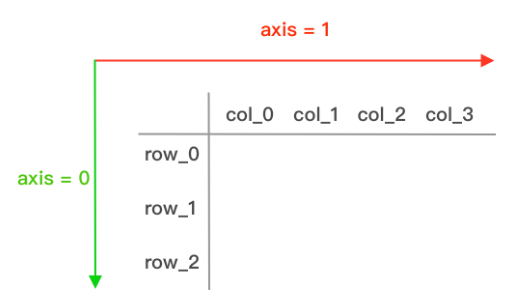

In [ ]:
# Our functions like .mean, .sum, .median, min/max evaluate an entire column, by default
# There's a default argument in .mean() that's axis=0 (which means column)
mpg[["cty", "hwy"]].mean(axis=0)

In [ ]:
mpg[["cty", "hwy"]].head()

In [ ]:
# axis=1 means execute the .mean on each row, row-wise execution
mpg[["cty", "hwy"]].mean(axis=1).head()

In [ ]:
# axis=1 calculates the row-wise average
mpg["average_mileage"] = mpg[["cty", "hwy"]].mean(axis=1)
mpg.head()

In [ ]:
# value_counts shows unique values and their distribution
mpg.cyl.value_counts()

In [ ]:
mpg.shape

In [ ]:
# Using Boolean Series to answer questions
# How many audis in the dataset
# True works as a 1, False works as 0
(mpg.manufacturer == "audi").sum()

In [ ]:
# What proportion of engines are 4 cylinders?
(mpg.cyl == 4).mean()

In [ ]:
# Using Boolean Series to filter a dataframe
mpg[mpg.cyl == 5]

In [ ]:
# You can mix and match the columns used to generate Booleans, the Boolean values don't care
mpg[(mpg.model == "maxima") | (mpg.cyl == 5)]

In [ ]:
# AND limits options. Both predicates must be true
mpg[(mpg["class"] == "midsize") & (mpg["displ"] < 2)]

In [ ]:
original_df = pd.DataFrame({"x": [1, 2, 3]})
original_df

In [ ]:
# Be careful assigning Python collections like this...
# This works the same way with lists, dictionaries, and many other collection objects
new_df = original_df
new_df

In [ ]:
original_df["y"] = original_df.x * 100
original_df

In [ ]:
new_df

In [ ]:
# Use .copy to make a proper copy of a dataframe
new_df = original_df.copy()
new_df

In [ ]:
original_df["z"] = 5000
original_df

In [ ]:
# The new df was created from a copy and avoids future mutation to the original dataframe
new_df

In [ ]:
# Sorting by a single column
mpg.sort_values(by=["average_mileage"], ascending=False, ignore_index=True).head()
#top 5 highest average milage vehicles

In [ ]:
# Sorting by multiple columns
mpg.sort_values(by=["hwy", "cty"], ascending=False, ignore_index=True).head()

In [ ]:
# Updating the dataframe to store the sorted values
# Use inplace=True or reassign the dataframe variable (not both)
mpg.sort_values(by="displ", ascending=False, ignore_index=True, inplace=True)
mpg.head()

## Additional Resources
- [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Pandas Comparison to Spreadsheets](https://pandas.pydata.org/docs/dev/getting_started/comparison/comparison_with_spreadsheets.html)
- [Pandas Comparison to SQL](https://pandas.pydata.org/docs/dev/getting_started/comparison/comparison_with_sql.html)

## Exercises
- Create a new column named `is_automatic` that holds a Boolean if that given vehicle is an automatic transmition or not.
- Use the `is_automatic` column to sum up the number of automatic vehicles in this dataset.
- Write the pandas code to determine what percentage of the vehicles are subcompacts?
- Combined fuel economy is a weighted average of the city value by 55% and the highway value by 45%. Use arithmetic operators to add a new column named `fuel_economy` to the `mpg` dataframe.
- Use Boolean masking to find all of the vehicles with a `fuel_economy` above the median `fuel_economy`.



In [ ]:
# Create a new column named `is_automatic` that holds a Boolean if that given vehicle is an automatic transmition or not.


In [ ]:
# Use the `is_automatic` column to sum up the number of automatic vehicles in this dataset.


In [ ]:
# Write the pandas code to determine what percentage of the vehicles are subcompacts?


In [ ]:
# Create a `fuel_economy` column. Fuel economy is a weighted average of the city value by 55% and the highway value by 45%


In [ ]:
# Use Boolean masking to find all of the vehicles with a `fuel_economy` above the median `fuel_economy`.
